<h3><b> Chapter 4: Classification </b></h3>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, 
                                           QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import seaborn as sns

<b> Q13a </b>

In [70]:
Weekly = load_data("Weekly")
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [71]:
Weekly_classified = pd.get_dummies(Weekly, dtype=int).drop("Direction_Down", axis=1)
Weekly_classified

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [72]:
Weekly_classified.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.022200
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Direction_Up,-0.022200,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


<Axes: >

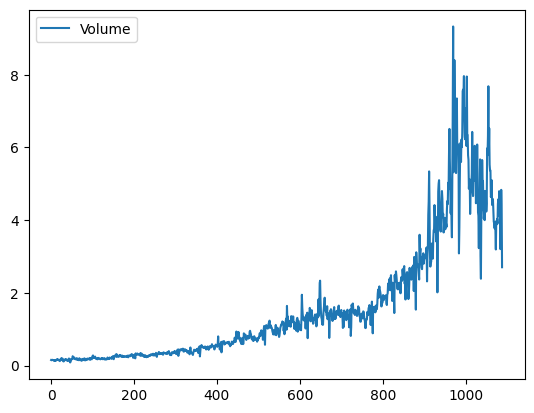

In [55]:
Weekly.plot(y="Volume")

In [74]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


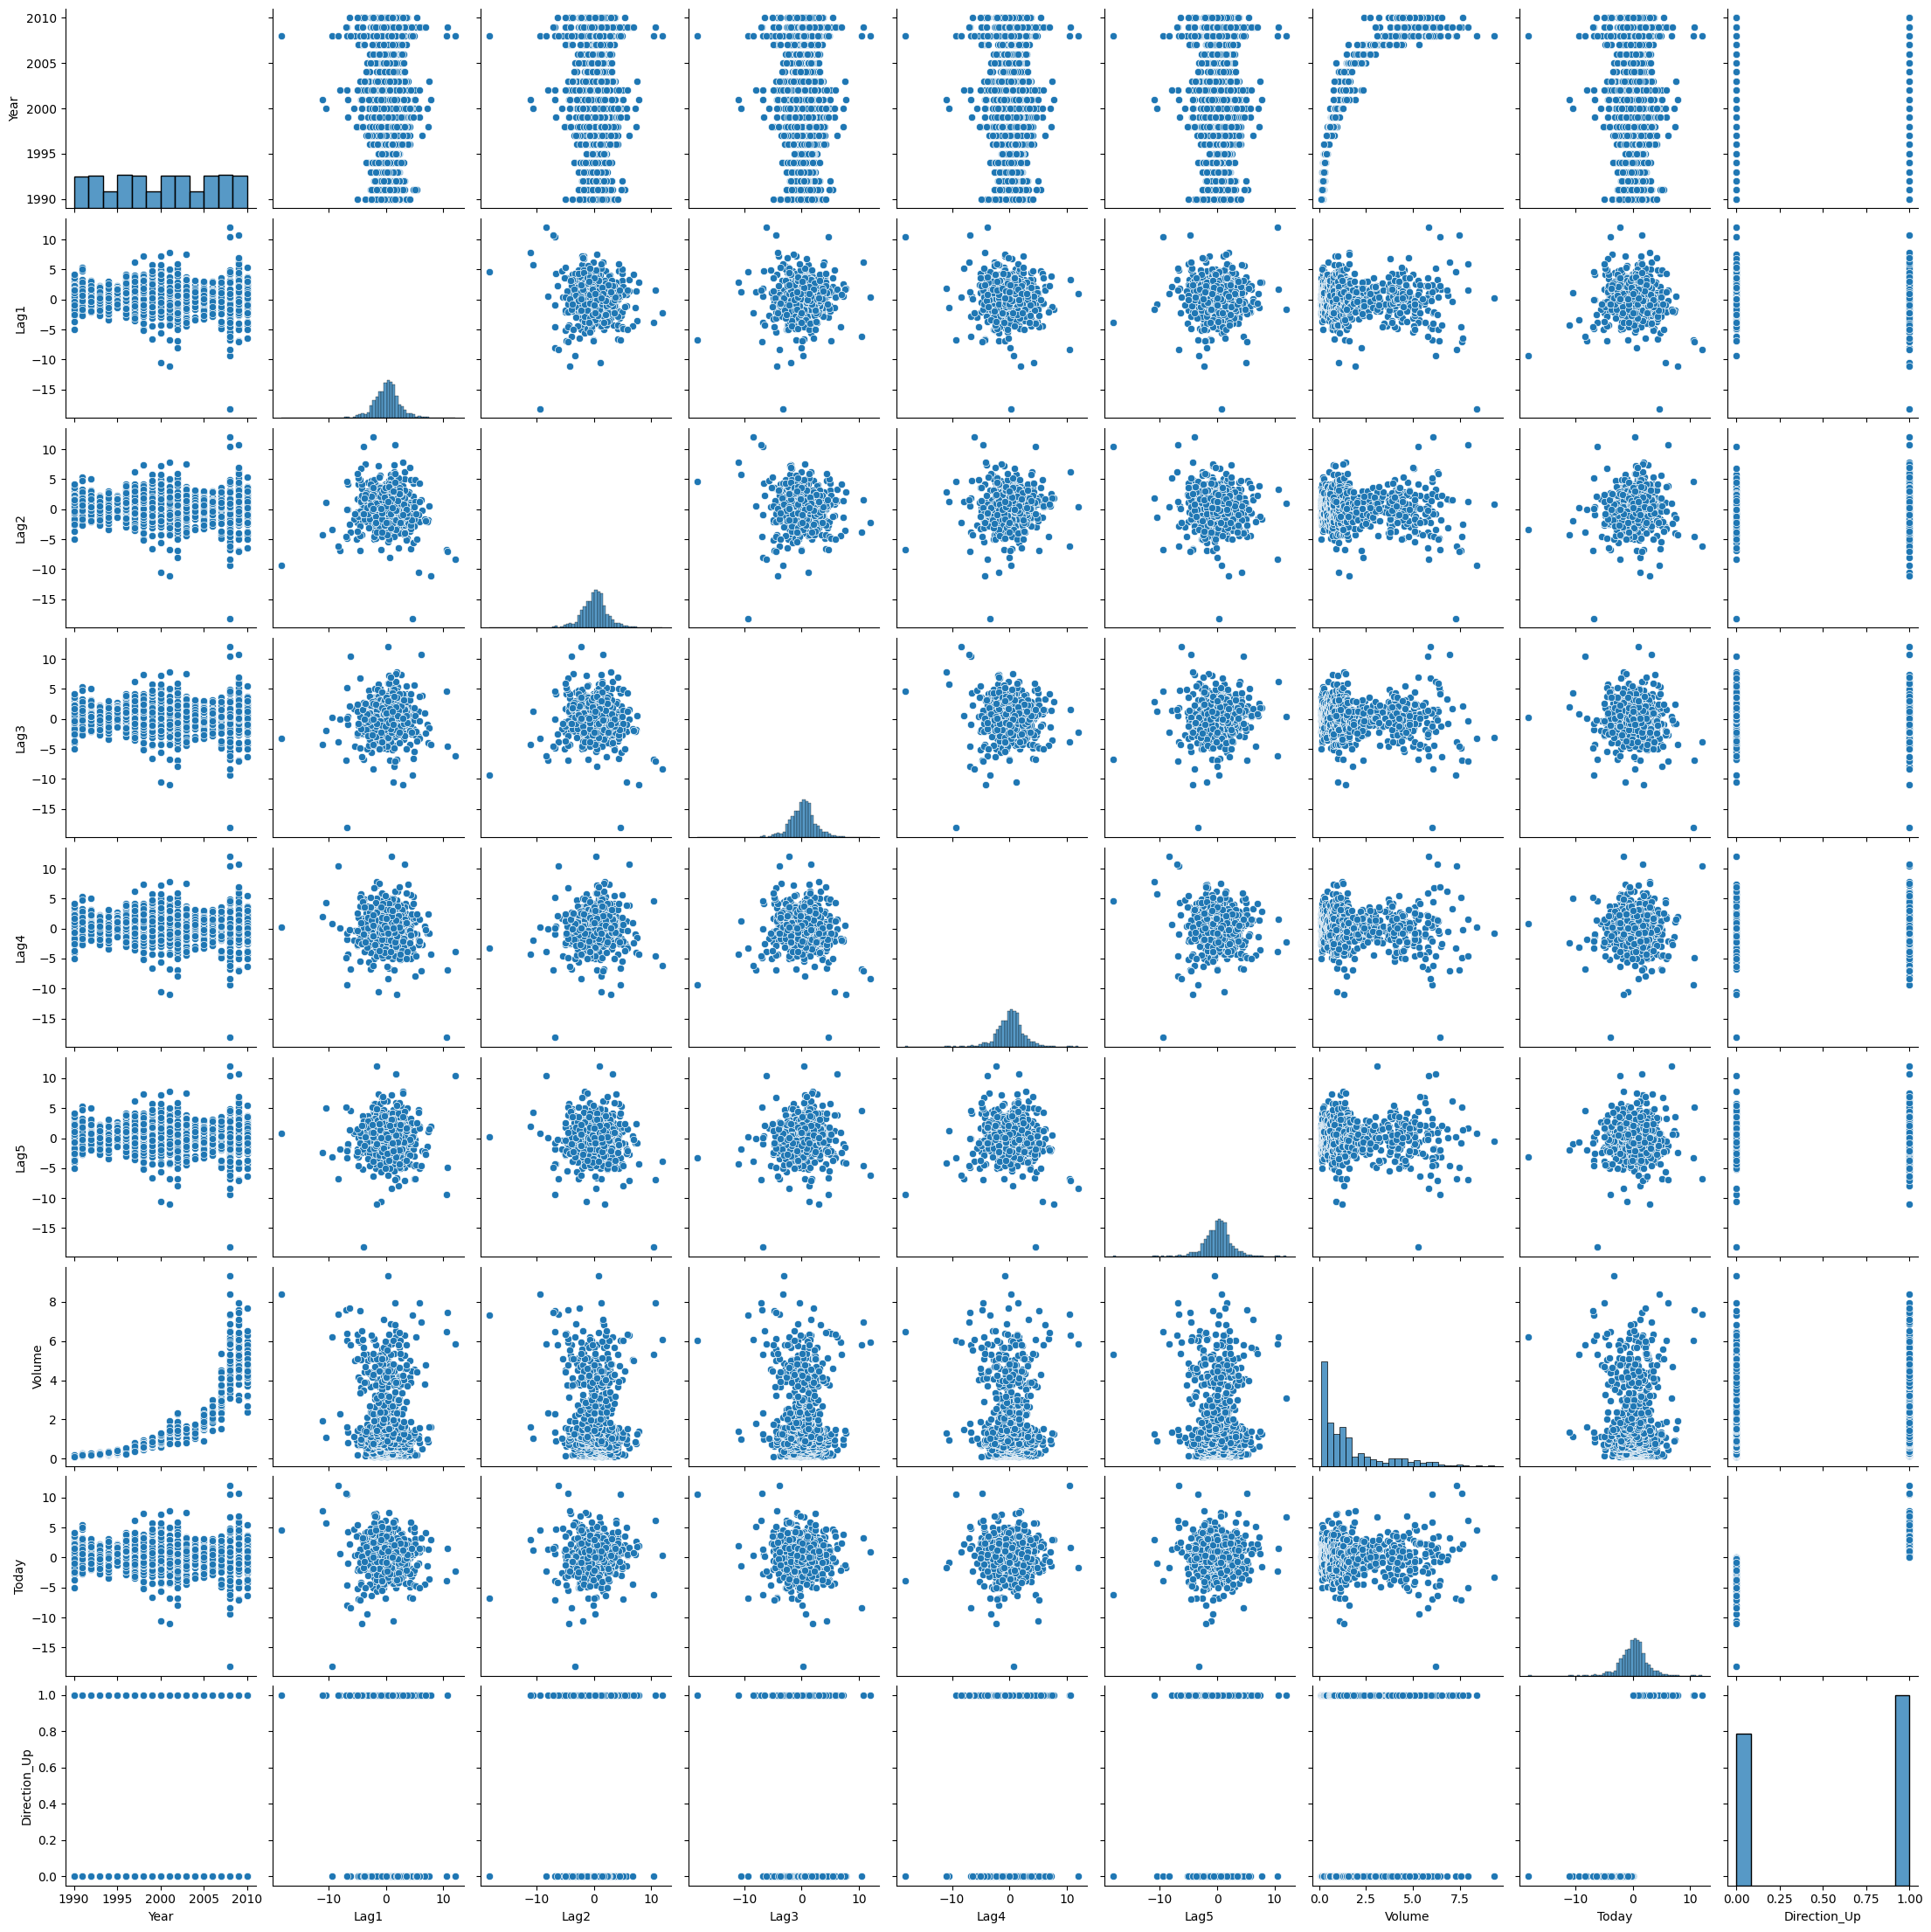

In [76]:
sns.pairplot(Weekly_classified)

<Axes: >

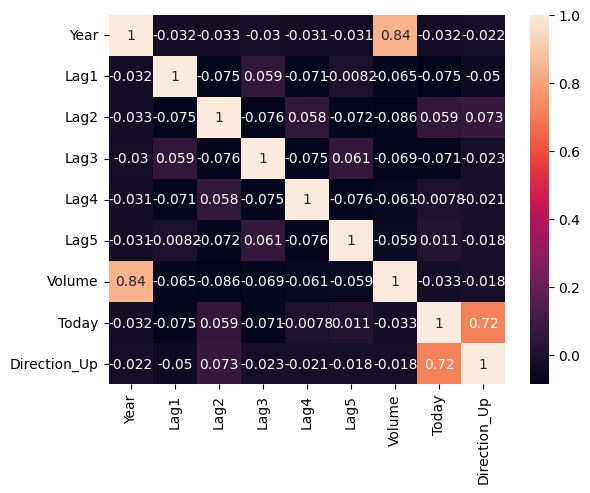

In [77]:
sns.heatmap(Weekly_classified.corr(numeric_only=True), annot=True,)

Through my findings:
1. Volume and Year has high correlation (0.84), and pairplot suggests an exponential relationship
2. Today and Direction_Up has high correlation (0.72), and pairplot suggests a logistic relationship 

<b> Q13b </b>

In [102]:
Weekly_vars = Weekly.columns.drop(["Year", "Today", "Direction"])
design = MS(Weekly_vars)
X = design.fit_transform(Weekly)
y = Weekly_classified["Direction_Up"]
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


Lag2 appears to be statistically significant as its p-value = 0.03 < 0.05 

<b> Q13c </b>

In [103]:
probs = results.predict()
labels = np.array(["Down"]*len(Weekly))
labels[probs>0.5] = "Up"
confusion_table(labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [104]:
(54+557)/len(Weekly), np.mean(labels == Weekly.Direction)

(0.5610651974288338, np.float64(0.5610651974288338))

Overall accuracy is 56.1%, which infers an training error rate of 43.9%, which is usually an optimistic estimation of the test error rate. Also, the confusion matrix shows the false positive rate (Predicted Up, Truth Down) to be 430/484 = 88.8%, which suggests high Type I error, this could suggest the classification using boundary = 0.5 to be inaccurate.

<b> Q13d </b>

In [ ]:
train = (Weekly.Year < 2009)
Weekly_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]

X = MS(["Lag2"]).fit_transform(Weekly)
y = Weekly_classified["Direction_Up"]
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm2 = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results2 = glm2.fit()
summarize(results2)

,coef,std err,z,P>|z|
intercept,0.2033,0.064,3.162,0.002
Lag2,0.0581,0.029,2.024,0.043


In [152]:
probs2 = results2.predict(X_test)
labels2 = np.array(["Down"]*len(Weekly_test))
labels2[probs2>0.5] = "Up"
logit_conf = confusion_table(labels2, Weekly_test.Direction)
logit_conf

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [153]:
(9+56)/len(Weekly_test)

0.625

<b> Q13e </b>

In [154]:
lda = LDA(store_covariance=True)
lda_fit = lda.fit(X_train, y_train)
lda_pred = lda_fit.predict(X_test)
label_lda = np.array(["Down"]*len(Weekly_test))
label_lda[lda_pred>0.5] = "Up"
lda_conf = confusion_table(label_lda, Weekly_test.Direction)
lda_conf

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [155]:
print(lda_fit.means_)
print(lda_fit.priors_)
print(lda_fit.scalings_)

[[ 1.         -0.03568254]
 [ 1.          0.26036581]]
[0.44771574 0.55228426]
[[ 0.        ]
 [-0.44141622]]


<b> Q13f </b>

In [130]:
qda = QDA(store_covariance=True)
qda_fit = qda.fit(X_train, y_train)
qda_pred = qda_fit.predict(X_test)
label_qda = np.array(["Down"]*len(Weekly_test))
label_qda[qda_pred>0.5] = "Up"
qda_conf = confusion_table(label_qda, Weekly_test.Direction)
qda_conf

c:\Users\winso\OneDrive\Documents\GitHub\ISL-Python\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\winso\OneDrive\Documents\GitHub\ISL-Python\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\winso\OneDrive\Documents\GitHub\ISL-Python\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1052: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\winso\OneDrive\Documents\GitHub\ISL-Python\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1052: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\winso\OneDrive\Do

Truth,Down,Up
Predicted,,
Down,43,61
Up,0,0


In [156]:
print(qda.means_)
print(qda.priors_)
print(qda.covariance_[0])
print(qda.covariance_[1])

[[ 1.         -0.03568254]
 [ 1.          0.26036581]]
[0.44771574 0.55228426]
[[0.         0.        ]
 [0.         4.83781758]]
[[0.         0.        ]
 [0.         5.37073888]]


<b> Q13g </b>

In [141]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_fit = knn1.fit(X_train, y_train)
knn1_pred = knn1_fit.predict(X_test)
label_knn1 = np.array(["Down"]*len(Weekly_test))
label_knn1[knn1_pred>0.5] = "Up"
knn1_conf = confusion_table(label_knn1, Weekly_test.Direction)
knn1_conf

Truth,Down,Up
Predicted,,
Down,22,31
Up,21,30


<b> Q13h </b>

In [142]:
NB = GaussianNB()
NB_fit = NB.fit(X_train, y_train)
NB_pred = NB_fit.predict(X_test)
label_NB = np.array(["Down"]*len(Weekly_test))
label_NB[NB_pred>0.5] = "Up"
NB_conf = confusion_table(label_NB, Weekly_test.Direction)
NB_conf

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [173]:
X_train

,intercept,Lag2
0,1.0,1.572
1,1.0,0.816
2,1.0,-0.270
3,1.0,-2.576
4,1.0,3.514
...,...,...
980,1.0,-8.389
981,1.0,12.026
982,1.0,-2.251
983,1.0,0.418


In [157]:
print(NB.class_prior_)
print(NB.theta_)
print(NB.var_)

[0.44771574 0.55228426]
[[ 1.         -0.03568254]
 [ 1.          0.26036581]]
[[5.14344918e-09 4.82684748e+00]
 [5.14344918e-09 5.36086620e+00]]


<b> Q13i </b>

In [168]:
# Overall test accuracy
print(f"Logistic regression has {round((logit_conf["Down"]["Down"] + logit_conf["Up"]["Up"])/ \
                                 len(Weekly_test)*100, 2)}% accuracy")
print(f"LDA has {round((lda_conf["Down"]["Down"] + lda_conf["Up"]["Up"])/ \
                                 len(Weekly_test)*100, 2)}% accuracy")
print(f"QDA has {round((qda_conf["Down"]["Down"] + qda_conf["Up"]["Up"])/ \
                                 len(Weekly_test)*100, 2)}% accuracy")
print(f"Naive Bayes has {round((NB_conf["Down"]["Down"] + NB_conf["Up"]["Up"])/ \
                                 len(Weekly_test)*100, 2)}% accuracy")
print(f"KNN1 has {round((knn1_conf["Down"]["Down"] + knn1_conf["Up"]["Up"])/ \
                                 len(Weekly_test)*100, 2)}% accuracy")
print("\n")

# False positive rate
print(f"Logistic regression has {round(logit_conf["Down"]["Up"]/ \
        (logit_conf["Down"]["Down"] + logit_conf["Down"]["Up"])*100, 2)}% FPR")
print(f"LDA has {round(lda_conf["Down"]["Up"]/ \
        (lda_conf["Down"]["Down"] + lda_conf["Down"]["Up"])*100, 2)}% FPR")
print(f"QDA has {round(qda_conf["Down"]["Up"]/ \
        (qda_conf["Down"]["Down"] + qda_conf["Down"]["Up"])*100, 2)}% FPR")
print(f"Naive Bayes has {round(NB_conf["Down"]["Up"]/ \
        (NB_conf["Down"]["Down"] + NB_conf["Down"]["Up"])*100, 2)}% FPR")
print(f"KNN1 has {round(knn1_conf["Down"]["Up"]/ \
        (knn1_conf["Down"]["Down"] + knn1_conf["Down"]["Up"])*100, 2)}% FPR")


Logistic regression has 62.5% accuracy
LDA has 62.5% accuracy
QDA has 41.35% accuracy
Naive Bayes has 58.65% accuracy
KNN1 has 50.0% accuracy


Logistic regression has 79.07% FPR
LDA has 79.07% FPR
QDA has 0.0% FPR
Naive Bayes has 100.0% FPR
KNN1 has 48.84% FPR


From absolute test accuracy, logistic regression and LDA is the most accurate with 62.5%, which may suggest a linear decision boundary. Naive Bayes is close with 58.65%, as there is only one predictor, which matches the independent predictor assumption. QDA and KNN1 has low accuracy since the sample size is small, thus having a disadvanatge in reducing variance. <br>

However, Naive Bayes have 100% FPR, which shows that it classified test data as "UP", this is then useless to predict the direction of the market movement. Therefore, logistic regression and LDA would be more viable options.